In [38]:
# Parameters
vname = "temp"
model_name = "AWICM-3"
model_path = "/work/ab0995/a270275/experiments/awicm3test011/outdata/fesom"
reference_path = "/work/ab0246/a270092/postprocessing/climatologies/fdiag/"
reference_years = "1985"
model_start = 1990
model_end = 1991
remap_resolution = "180x91"
year=[model_start,model_end]
#remap_resolution = "180x91"
mesh_file = "mesh.nc"
meshpath = "/work/ab0246/a270092/input/fesom2/core2/"
out_path = "./output/"
dpi = 150
tripyview_path="/home/a/a270275/tripyview"
tripyview_path="/home/a/a270275/tripyview"
# parameters
#___Dask Client Parameters____________________________________________________________
do_papermill      = False
do_parallel       = True
parallel_tnprc    = 128                          # total number of available CPUs
parallel_nprc     = 72                           # number of dask workers
parallel_nprc_bin = parallel_tnprc-parallel_nprc # number of processor used to parallize the binning loop
parallel_tmem     = 200                          # max. available RAM

#___Mesh Path & Save Path_____________________________________________________________
# mesh_path ='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
save_path         = '/work/ab0995/a270275/runconfig/Results/AWICM3_test031' #~/figures/test_papermill/'
save_fname        = None # filename from papermill come in through save_fname
tripyrun_name     = 'AWICM3_test018' # papermill workflow name of notebook 
tripyrun_analysis = None # papermill diagnostic driver
tripyrun_spath_nb = None # papermill path to processed notebooks
tripyrun_spath_fig= None # papermill path to processed figures

#___Data Path & Input Names___________________________________________________________
input_paths   = list()
input_paths.append('/work/ab0995/a270275/experiments/5Ymulti_diag/outdata/fesom/')


input_names   = list()
input_names.append('Fesom 2.6')
input_paths = ["/work/ab0995/a270275/experiments/awicm3test011/outdata/fesom"]
# n_cycl: which spinupcycle should be plottet if do_allcycl all spinupcycles from [1...n_cycle] are plottet, if None path is directly used
n_cycl    = None
do_allcycl= False


mon, day, record, box, depth = None, None, None, None, None

In [39]:
# Add the parent directory to sys.path and load config
import sys
import os
import pdb
print("tripypath",tripyview_path)
sys.path.append(tripyview_path)
from config import *

model_path = os.path.dirname(model_path)

# Mark as started
SCRIPT_NAME = "part15_enso.ipynb"   #ADAPT
update_status(SCRIPT_NAME, " Started")


tripypath /home/a/a270275/tripyview


Box Coords: lon(190 to 240), lat(-5 to 5)
/work/ab0246/a270092/input/fesom2/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ab0246/a270092/input/fesom2/core2/pickle_mesh_py3_fesom2
Depth is None, 3d field will be returned
data load time: 0.01 seconds
<class 'xarray.core.dataarray.DataArray'>


100%|██████████| 2/2 [00:00<00:00, 25.61it/s]


Data processing time: 0.08 seconds
conversion to np array time: 0.00 seconds


100%|██████████| 24/24 [00:01<00:00, 21.49it/s]


Creating figure...
Checking colormap...
Colormap Loaded: <matplotlib.colors.LinearSegmentedColormap object at 0x7fff77a9d760>
Shape of eof1_corr: (1, 92, 181), Type: <class 'numpy.ndarray'>
Shape of lon2: (92, 181), Type: <class 'numpy.ndarray'>
Shape of lat2: (92, 181), Type: <class 'numpy.ndarray'>
Longitude range: 110.0 to 290.0
Latitude range: -46.0 to 46.0
Creating GeoAxes with PlateCarree projection...
Contour levels: [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
Creating filled contour plot...
Fill contour levels: [-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
Line contour colors: ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black']
Creating line contour plot...
Adding land and coastline features...
Adding text annotations 

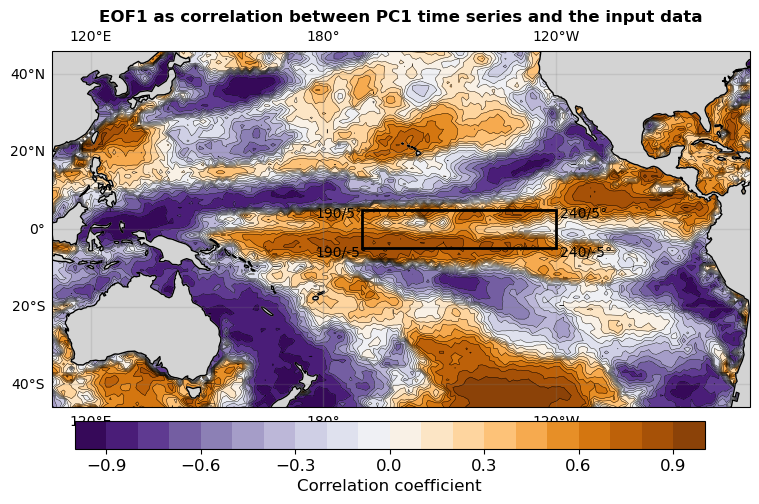

100%|██████████| 24/24 [00:00<00:00, 29.98it/s]
/tmp/ipykernel_2616325/3300649190.py:420: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('PuOr_r')
/tmp/ipykernel_2616325/3300649190.py:455: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('PuOr_r')


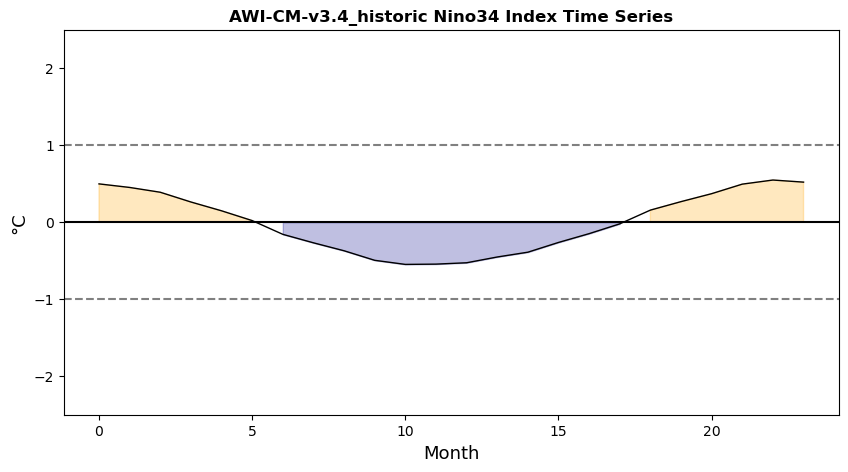

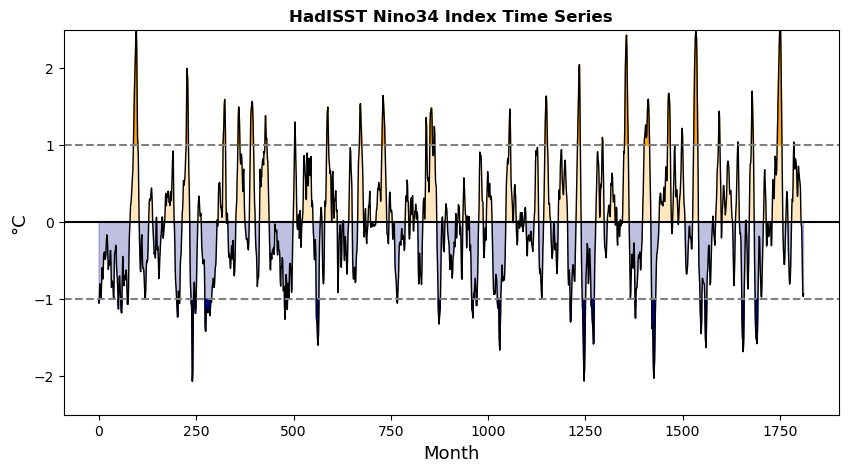

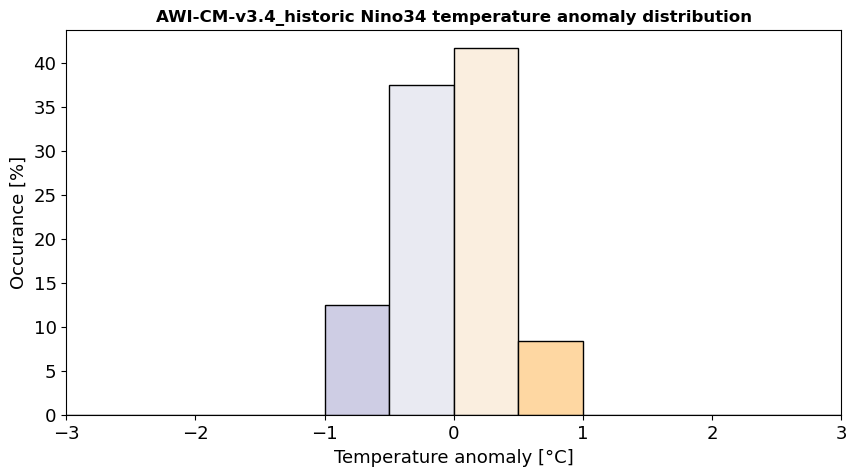

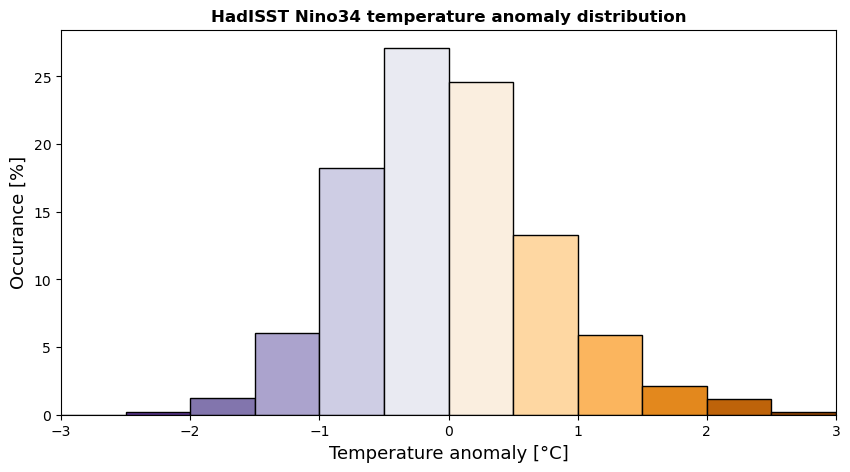

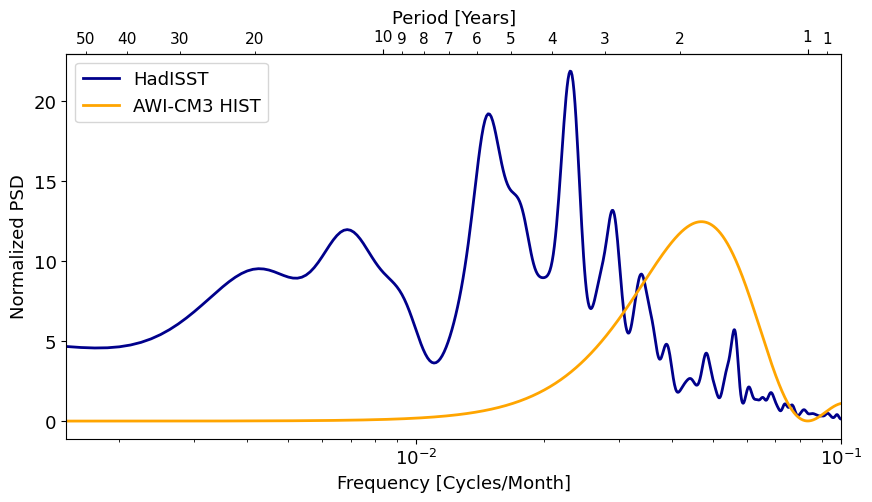

In [40]:
out_path = save_path +  "/figures"
# interpolate data onto regular grid
# select Nino index region


box = 'Nino34'
saved_filenames=[]

if box == 'Nino12':
    lon_min=270 #(-90+360) 
    lon_max=280 #(-80+360) 
    lat_min=-10
    lat_max= 0
elif box == 'Nino3':
    lon_min=210 #(-150+360)
    lon_max=270 #(-90+360)
    lat_min=-5
    lat_max= 5
elif box == 'Nino34':
    lon_min=190 #(-170+360)
    lon_max=240 #(-120+360)
    lat_min=-5
    lat_max= 5
elif box == 'Nino4':
    lon_min=160 
    lon_max=210 #(-150+360)
    lat_min=-5
    lat_max= 5


print(f"Box Coords: lon({lon_min} to {lon_max}), lat({lat_min} to {lat_max})")



# parameters cell
variable = 'sst'

input_paths = [model_path+'/fesom']
input_names = [model_name]
years=range(model_start, model_end+1)
figsize=(10, 5)


# load mesh and data
mesh = pf.load_mesh(meshpath, abg=abg, 
                    usepickle=True, usejoblib=False)
t1 = time.time()

data_raw = pf.get_data(input_paths[0], 'sst', years, mesh, how=None, compute=False, silent=False)
t2 = time.time()
print("data load time: {:.2f} seconds".format(t2 - t1))

model_lon = mesh.x2
model_lon = np.where(model_lon < 0, model_lon+360, model_lon)
model_lat = mesh.y2


print(type(data_raw))
# Assuming data_raw and years are defined somewhere in your code
steps_per_year = int(np.shape(data_raw)[0] / len(years))
data = np.empty((len(years), data_raw.shape[1]))  # Preallocate array

t3 = time.time()
for y in tqdm(range(len(years))):
    data[y, :] = np.mean(data_raw[y*steps_per_year : y*steps_per_year + steps_per_year - 1, :], axis=0)
t4 = time.time()
print("Data processing time: {:.2f} seconds".format(t4 - t3))





'''
data = []
steps_per_year=int(np.shape(data_raw)[0]/len(years))
t3 = time.time()
for y in tqdm(range(len(years))):
    data.append(np.mean(data_raw[y*steps_per_year:y*steps_per_year+steps_per_year-1,:],axis=0))
t4 = time.time()
print("data append time: {:.2f} seconds".format(t4 - t3))
t5 = time.time()
print(type(data))
print(len(data))
data = np.asarray(data)
t6 = time.time()
print("conversion to np array time: {:.2f} seconds".format(t6 - t5))
'''
t7 = time.time()
data = signal.detrend(data)


t8 = time.time()
print("conversion to np array time: {:.2f} seconds".format(t8 - t7))

# Detrend linearly to remove forcing or spinup induced trends
# TODO: probably better to detrend with something like a 50 year running mean
data_raw = signal.detrend(data_raw)

# Reshape to add monthly time axis
data_raw_reshape = data_raw.reshape(data_raw.shape[0]//12,data_raw.shape[1], 12)

# Calculate seasonal cycle
data_season_cycle = np.mean(data_raw_reshape,axis=0)

# Repeat seasonal cycle
data_season_cycle_repeat = np.repeat(data_season_cycle[np.newaxis,...],np.shape(data_raw_reshape)[0],axis=0)

# Reshape into original format
data_season_cycle_repeat_reshape = data_season_cycle_repeat.reshape(np.shape(data_raw))

# Remove seasonal cycle from data
data = data_raw - data_season_cycle_repeat_reshape

#select ENSO region
lon = np.linspace(110, 290, 181)
lat = np.linspace(-46, 46, 92)
lon2, lat2 = np.meshgrid(lon, lat)

# interpolate data onto regular grid
sst = []
points = np.vstack((model_lon, model_lat)).T
for t in tqdm(range(0, np.shape(data)[0])):
    nn_interpolation = NearestNDInterpolator(points, data[t,:])
    sst.append(nn_interpolation((lon2, lat2)))
sst=np.asarray(sst)

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(lat))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1_corr = solver.eofsAsCorrelation(neofs=1)
eof1 = solver.eofs(neofs=1, eofscaling=0)

eof_abs = solver.eofs(neofs=1)
pc1 = -np.squeeze(solver.pcs(npcs=1, pcscaling=1))

# Sign of correlation is arbitrary, but plot should be positive
if np.mean(eof1_corr) < 0:
    eof1_corr = eof1_corr
if np.mean(eof1) < 0:
    eof1 = -eof1
    
title='EOF1 as correlation between PC1 time series and the input data'
    
# Debug: Creating figure
print("Creating figure...")
fig = plt.figure(figsize=(9, 5.56))

# Debug: Checking colormap
print("Checking colormap...")
try:
    colormap = plt.colormaps.get_cmap('PuOr_r')  # Updated for modern Matplotlib
except AttributeError:
    colormap = plt.cm.PuOr_r  # Fallback for older versions
print(f"Colormap Loaded: {colormap}")

# Debug: Ensure proper data types
print(f"Shape of eof1_corr: {eof1_corr.shape}, Type: {type(eof1_corr)}")
print(f"Shape of lon2: {lon2.shape}, Type: {type(lon2)}")
print(f"Shape of lat2: {lat2.shape}, Type: {type(lat2)}")

eof1_corr = np.nan_to_num(eof1_corr.astype(np.float64))  # Ensure proper numeric type

# Debug: Checking coordinate ranges
print(f"Longitude range: {lon2.min()} to {lon2.max()}")
print(f"Latitude range: {lat2.min()} to {lat2.max()}")

# Create projection
print("Creating GeoAxes with PlateCarree projection...")
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))

# Contour levels
clevs = np.linspace(-1, 1, 21)
print(f"Contour levels: {clevs}")

# Debug: Creating filled contour plot
print("Creating filled contour plot...")

# Define mask for the region
region_mask = (lon2 >= 190) & (lon2 <= 240) & (lat2 >= -5) & (lat2 <= 5)

# Compute mean in the specified region
region_mean = np.nanmean(eof1_corr.squeeze()[region_mask])

# If mean is negative, flip the sign of the entire array
if region_mean < 0:
    eof1_corr = -eof1_corr

fill = ax.contourf(lon2, lat2, eof1_corr.squeeze(), clevs,
                   transform=ccrs.PlateCarree(), cmap=colormap, zorder=-1)
print(f"Fill contour levels: {fill.levels}")

# Debug: Creating contour lines
line_colors = ['black' for _ in fill.levels]
print(f"Line contour colors: {line_colors}")
print("Creating line contour plot...")
con = ax.contour(lon2, lat2, eof1_corr.squeeze(), clevs, colors=line_colors, linewidths=0.3,
                 transform=ccrs.PlateCarree(), zorder=-1)

# Adding features
print("Adding land and coastline features...")
ax.add_feature(cfeature.LAND, color='lightgrey')
ax.add_feature(cfeature.COASTLINE)


# Add bounding box
ax.add_patch(mpatches.Rectangle(xy=[lon_min, lat_min], width=lon_max-lon_min, height=lat_max-lat_min,
                                facecolor='none', edgecolor='Black', lw=2,
                                transform=ccrs.PlateCarree(), zorder=6))

# Debug: Text annotations
print("Adding text annotations for box corners...")
plt.text(lon_min-202, lat_min-2, f"{lon_min}/{lat_min}°")
plt.text(lon_min-202, lat_max-2, f"{lon_min}/{lat_max}°")
plt.text(lon_max-189, lat_max-2, f"{lon_max}/{lat_max}°")
plt.text(lon_max-189, lat_min-2, f"{lon_max}/{lat_min}°")

# Debug: Adding gridlines
print("Adding gridlines...")
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.2, linestyle='-')
gl.xlabels_bottom = False

# Colorbar setup
print("Creating colorbar...")
cbar_ax_abs = fig.add_axes([0.15, 0.1, 0.7, 0.05])
cb = fig.colorbar(fill, cax=cbar_ax_abs, orientation='horizontal')
cb.ax.tick_params(labelsize=12)
cb.set_label('Correlation coefficient', fontsize=12)

# Fixing title type
title = str("EOF1 as correlation between PC1 time series and the input data")  # Ensure it's a string
print(f"Setting figure title: {title}")
ax.set_title(title, fontweight="bold")

# Debug: Save figure
ofile = 'enso'
print(f"Output filename: {ofile}")

if ofile:
    ofile = "_enso_eof_corr.png"
    total_path = out_path + "/" + tripyrun_name + '_part15_' + ofile + '.png'
    

    # Ensure output directory exists
    if not os.path.exists(out_path):
        print(f"Creating output directory: {out_path}")
        os.makedirs(out_path)

    print(f"Saving figure to: {total_path}")

    try:
        # Ensure valid metadata
        fig.canvas.manager.set_window_title("EOF Plot")  # Avoid non-numeric titles

        # Check the figure before saving
        print(f"Figures open: {plt.get_fignums()}")
        print(f"Active figure type: {type(fig)}")
        print(f"Axes in figure: {fig.axes}")

        # Check if all axes have numeric data
        for ax in fig.axes:
            print(f"Checking axis: {ax}")
            print(f"Title: {ax.get_title()}, Type: {type(ax.get_title())}")
            print(f"X-label: {ax.get_xlabel()}, Type: {type(ax.get_xlabel())}")
            print(f"Y-label: {ax.get_ylabel()}, Type: {type(ax.get_ylabel())}")

            for label in ax.get_xticklabels() + ax.get_yticklabels():
                print(f"Tick label: '{label.get_text()}', Type: {type(label.get_text())}")

            for text in ax.texts:
                print(f"Text: '{text.get_text()}', Type: {type(text.get_text())}")

        #plt.savefig(total_path, dpi=300)
        saved_filenames.append(total_path)
        print("Figure saved successfully!")

    except Exception as e:
        print(f"Error saving figure: {e}")

plt.show()

    
    
lon = np.linspace(lon_min, lon_max, lon_max-lon_min)
lat = np.linspace(lat_min, lat_max, lat_max-lat_min)
lon2, lat2 = np.meshgrid(lon, lat)

sst = []
points = np.vstack((model_lon, model_lat)).T
for t in tqdm(range(0, np.shape(data_raw)[0])):
    nn_interpolation = NearestNDInterpolator(points, data[t,:])
    sst.append(nn_interpolation((lon2, lat2)))
sst=np.asarray(sst)
sst_area_mean = np.mean(np.mean(sst,axis=2),axis=1)
sst_nino = sst_area_mean.reshape(len(sst_area_mean)//12, 12)
sst_nino_ano = sst_nino - np.mean(sst_nino)

obs_path = observation_path+'/hadisst2/box'



from cdo import *   # python version
cdo = Cdo()
obs_raw = cdo.copy(input=str(obs_path),returnArray='sst')
del cdo
from scipy import signal
obs_raw = obs_raw[0:1812]

# Detrend linearly to remove forcing or spinup induced trends
# TODO: probably better to detrend with something like a 50 year running mean
data_raw = signal.detrend(data_raw)
#obs_raw = signal.detrend(obs_raw)

# Reshape to add monthly time axis
data_raw_reshape = data_raw.reshape(data_raw.shape[0]//12,data_raw.shape[1], 12)
obs_raw_reshape = obs_raw.reshape(obs_raw.shape[0]//12,obs_raw.shape[1],obs_raw.shape[2], 12)

# Calculate seasonal cycle
data_season_cycle = np.mean(data_raw_reshape,axis=0)
obs_season_cycle = np.mean(obs_raw_reshape,axis=0)

# Repeat seasonal cycle
data_season_cycle_repeat = np.repeat(data_season_cycle[np.newaxis,...],np.shape(data_raw_reshape)[0],axis=0)
obs_season_cycle_repeat = np.repeat(obs_season_cycle[np.newaxis,...],np.shape(obs_raw_reshape)[0],axis=0)

# Reshape into original format
data_season_cycle_repeat_reshape = data_season_cycle_repeat.reshape(np.shape(data_raw))
obs_season_cycle_repeat_reshape = obs_season_cycle_repeat.reshape(np.shape(obs_raw))

# Remove seasonal cycle from data
data = data_raw - data_season_cycle_repeat_reshape
obs = obs_raw - obs_season_cycle_repeat_reshape



def smooth3(x,beta):
    """ kaiser window smoothing """
    window_len=3
    beta=2
    # extending the data at beginning and at the end
    # to apply the window at the borders
    s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w = np.kaiser(window_len,beta)
    y = np.convolve(w/w.sum(),s,mode='valid')
    return y[1:len(y)-1]

obs_nino = obs.reshape(len(obs)//12, 12)
obs_nino_ano = obs_nino - np.mean(obs_nino)

# Seasonal smoothing
sst_nino_ano_smooth=smooth3(sst_nino_ano.flatten(),len(sst_nino_ano.flatten()))
obs_nino_ano_smooth=smooth3(obs_nino_ano.flatten(),len(obs_nino_ano.flatten()))

# Plot the leading PC time series.

plt.figure(figsize=figsize)
plt.plot(sst_nino_ano_smooth, color='black', linewidth=1) 
plt.axhline(0, color='k')
plt.title(historic_name+' '+box+' Index Time Series',fontweight="bold")
plt.xlabel('Month',fontsize=13)
plt.ylabel('°C',fontsize=13)
ax.tick_params(labelsize=13)

plt.ylim(-2.5, 2.5)
plt.axhline(y=1, color='grey', linestyle='--')
plt.axhline(y=-1, color='grey', linestyle='--')

months = np.arange(len(sst_nino_ano.flatten()))

plt.fill_between(months, sst_nino_ano_smooth, 0, where = (sst_nino_ano_smooth > 0), color='Orange',alpha=0.25)
plt.fill_between(months, sst_nino_ano_smooth, -0, where = (sst_nino_ano_smooth < -0), color='darkblue',alpha=0.25)

plt.fill_between(months, sst_nino_ano_smooth, 1, where = (sst_nino_ano_smooth > 1), color='Orange')
plt.fill_between(months, sst_nino_ano_smooth, -1, where = (sst_nino_ano_smooth < -1), color='darkblue')


if ofile is not None:
    ofile = box+"_enso_box_index.png"
    total_path = out_path + "/" + tripyrun_name + '_part15_' + ofile + '.png'
    
    #plt.savefig(total_path, dpi=dpi,bbox_inches='tight')
    #saved_filenames.append(total_path)

    
    
# Plot the leading PC time series.

plt.figure(figsize=figsize)
plt.plot(obs_nino_ano_smooth, color='black', linewidth=1) 
plt.axhline(0, color='k')
plt.title('HadISST '+box+' Index Time Series',fontweight="bold")
plt.xlabel('Month',fontsize=13)
plt.ylabel('°C',fontsize=13)
ax.tick_params(labelsize=13)

plt.ylim(-2.5, 2.5)
plt.axhline(y=1, color='grey', linestyle='--')
plt.axhline(y=-1, color='grey', linestyle='--')

months = np.arange(len(obs_nino_ano.flatten()))

plt.fill_between(months, obs_nino_ano_smooth, 0, where = (obs_nino_ano_smooth > 0), color='Orange',alpha=0.25)
plt.fill_between(months, obs_nino_ano_smooth, -0, where = (obs_nino_ano_smooth < -0), color='darkblue',alpha=0.25)
plt.fill_between(months, obs_nino_ano_smooth, 1, where = (obs_nino_ano_smooth > 1), color='Orange')
plt.fill_between(months, obs_nino_ano_smooth, -1, where = (obs_nino_ano_smooth < -1), color='darkblue')


if ofile is not None:
    ofile_long = f"HadISST_"+box+"_enso_box_index.png"
    #plt.savefig(f"{out_path+ofile_long}", dpi=dpi,bbox_inches='tight')
    saved_filenames.append(f"{out_path+ofile_long}")
    
    
# Obtain data
Ntotal = len(sst_nino_ano_smooth)
data = sst_nino_ano_smooth

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('PuOr_r')

# Get the histogramp
nbins = 13
minbin = -3
maxbin = 3
bins = np.linspace(minbin,maxbin,nbins)

Y,X = np.histogram(data, bins=bins)
Y = (Y*100)/np.sum(Y)
x_span = X.max()-X.min()
corr=(x_span/nbins)/2
C = [cm(((x-X.min()+corr)/x_span)) for x in X]

fig, ax = plt.subplots(figsize=figsize)

plt.bar(X[:-1],Y,color=C,width=X[1]-X[0],edgecolor='black',align='edge')
plt.xlim((minbin, maxbin))
plt.title(historic_name+' '+box+' temperature anomaly distribution',fontweight="bold")
plt.ylabel("Occurance [%]",fontsize=13)
plt.xlabel("Temperature anomaly [°C]",fontsize=13)
ax.tick_params(labelsize=13)


if ofile is not None:
    ofile_long = f"{ofile}_"+box+"_enso_temperature_distribution.png"
    #plt.savefig(f"{out_path+ofile_long}", dpi=dpi,bbox_inches='tight')
    saved_filenames.append(f"{out_path+ofile_long}")
    
    
# Obtain data
Ntotal = len(obs_nino_ano_smooth)
data = obs_nino_ano_smooth

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('PuOr_r')

# Get the histogramp
nbins = 13
minbin = -3
maxbin = 3
bins = np.linspace(minbin,maxbin,nbins)

Y,X = np.histogram(data, bins=bins)
Y = (Y*100)/np.sum(Y)
x_span = X.max()-X.min()
corr=(x_span/nbins)/2
C = [cm(((x-X.min()+corr)/x_span)) for x in X]

fig, ax = plt.subplots(figsize=figsize)

plt.bar(X[:-1],Y,color=C,width=X[1]-X[0],edgecolor='black',align='edge')
plt.xlim((minbin, maxbin))
plt.title('HadISST '+box+' temperature anomaly distribution',fontweight="bold")
plt.ylabel("Occurance [%]",fontsize=13)
plt.xlabel("Temperature anomaly [°C]",fontsize=13)

if ofile is not None:
    ofile_long = f"HadISST_"+box+"_enso_temperature_distribution.png"
    #plt.savefig(f"{out_path+ofile_long}", dpi=dpi,bbox_inches='tight')

    
    

def smooth(x,beta):
    """ kaiser window smoothing """
    window_len=201
    beta=200
    # extending the data at beginning and at the end
    # to apply the window at the borders
    s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w = np.kaiser(window_len,beta)
    y = np.convolve(w/w.sum(),s,mode='valid')
    return y[100:len(y)-100]




f, Pxx_den = signal.periodogram(sst_nino_ano.flatten(),nfft=8000)
f_obs, Pxx_den_obs = signal.periodogram(obs_nino_ano.flatten(),nfft=8000)
#f_obsn, Pxx_den_obsn = signal.periodogram(obs_nino_ano.flatten(),nfft=250)

fig, ax = plt.subplots(figsize=figsize)

#ax.plot(f_obsn,Pxx_den_obsn/np.mean(Pxx_den_obsn),linewidth=1,color='orange',label='HadISST')

ax.semilogx(f_obs,smooth(Pxx_den_obs/np.mean(Pxx_den_obs),len(Pxx_den)),linewidth=2,color='darkblue',label='HadISST')
ax.semilogx(f,smooth(Pxx_den/np.mean(Pxx_den),len(Pxx_den)),linewidth=2,color='orange',label='AWI-CM3 HIST')


ax.set_xlim([0.0015, 0.1])
#ax.set_ylim([0.01, 25])
plt.xlabel('Frequency [Cycles/Month]',fontsize=13)
plt.ylabel('Normalized PSD',fontsize=13)
plt.legend(loc='upper left',fontsize=13)
#ax.set_xscale('log')
ax.tick_params(labelsize=13)

def twelve_over(x):
    """Vectorized 12/x, treating x==0 manually"""
    x = np.array(x*12).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = np.inf
    x[~near_zero] = 1 / x[~near_zero]
    return x

# the function "12/x" is its own inverse
inverse = twelve_over

#secax.set_xticks([50,12,8,6,5,4,3,2,1])
secax = ax.secondary_xaxis('top', functions=(twelve_over, inverse))
secax.set_xlabel('Period [Years]',fontsize=13)
secax.set_xlabel('Period [Years]',fontsize=13)
secax.xaxis.set_major_formatter(FormatStrFormatter("%1.f"))
secax.xaxis.set_minor_formatter(FormatStrFormatter("%1.f"))
secax.tick_params(axis='x', which='major', labelsize=11)
secax.tick_params(axis='x', which='minor', labelsize=11)

if ofile is not None:
    ofile_long = f"{ofile}_enso_"+box+"_box_norm_psd.png"
    #plt.savefig(f"{out_path+ofile_long}", dpi=300,bbox_inches='tight')
    saved_filenames.append(f"{out_path+ofile_long}")
# Mark script as completed
update_status(SCRIPT_NAME, "Completed")

/tmp/ipykernel_2616325/3174212368.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('PuOr_r')


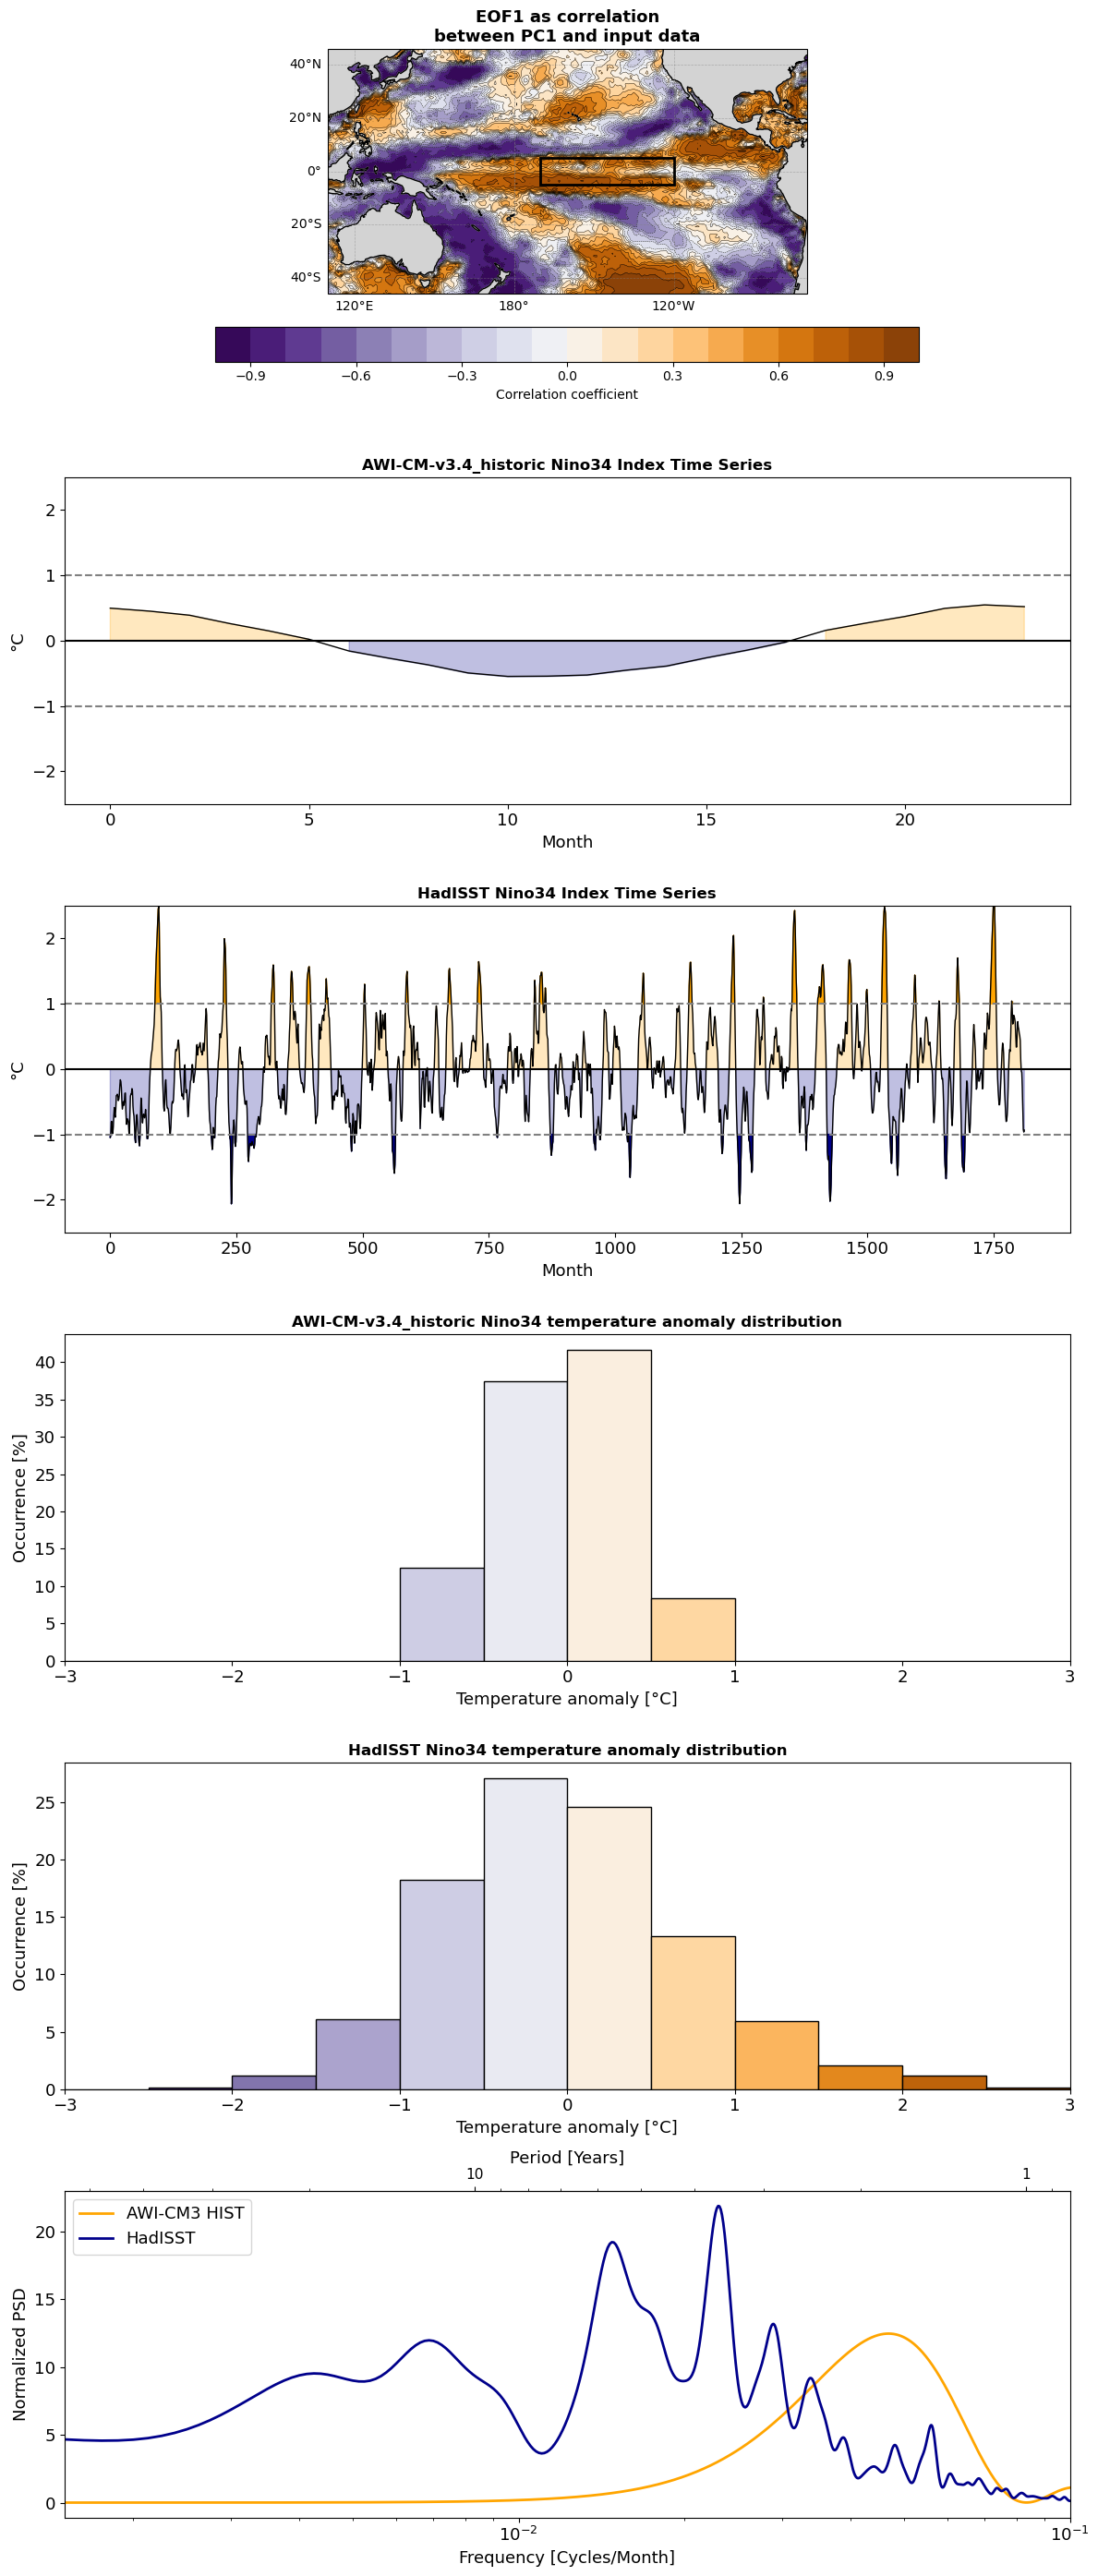

In [41]:
# 1: EOF1-Korrelationskarte (jetzt GANZ OBEN)

fig_summary = plt.figure(figsize=(12, 28))  # etwas höher für 6 Plots
lon = np.linspace(110, 290, 181)
lat = np.linspace(-46, 46, 92)
lon2, lat2 = np.meshgrid(lon, lat)
# 1: EOF1-Korrelationskarte (ganz oben)
ax1 = plt.subplot(6, 1, 1, projection=ccrs.PlateCarree(central_longitude=190))
clevs = np.linspace(-1, 1, 21)
region_mask = (lon2 >= 190) & (lon2 <= 240) & (lat2 >= -5) & (lat2 <= 5)
region_mean = np.nanmean(eof1_corr.squeeze()[region_mask])
if region_mean < 0:
    eof1_corr = -eof1_corr
fill = ax1.contourf(lon2, lat2, eof1_corr.squeeze(), clevs,
                    transform=ccrs.PlateCarree(), cmap='PuOr_r', zorder=-1)
ax1.contour(lon2, lat2, eof1_corr.squeeze(), clevs, colors='black', linewidths=0.3,
            transform=ccrs.PlateCarree(), zorder=-1)
ax1.add_feature(cfeature.LAND, color='lightgrey')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_patch(mpatches.Rectangle(xy=[lon_min, lat_min],
                                 width=lon_max-lon_min, height=lat_max-lat_min,
                                 facecolor='none', edgecolor='black', lw=2,
                                 transform=ccrs.PlateCarree(), zorder=6))

gl = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

ax1.set_title('EOF1 as correlation\nbetween PC1 and input data', fontsize=13, weight='bold')
cbar = plt.colorbar(fill, ax=ax1, orientation='horizontal', pad=0.10, shrink=0.7)
cbar.set_label('Correlation coefficient', fontsize=10)

# 2: Modellierte Box-Zeitreihe
ax2 = plt.subplot(6, 1, 2)
ax2.plot(sst_nino_ano_smooth, color='black', linewidth=1)
ax2.axhline(0, color='k')
ax2.set_title(historic_name+' '+box+' Index Time Series', fontweight="bold")
ax2.set_xlabel('Month', fontsize=13)
ax2.set_ylabel('°C', fontsize=13)
ax2.tick_params(labelsize=13)
ax2.set_ylim(-2.5, 2.5)
ax2.axhline(y=1, color='grey', linestyle='--')
ax2.axhline(y=-1, color='grey', linestyle='--')
months = np.arange(len(sst_nino_ano_smooth))
ax2.fill_between(months, sst_nino_ano_smooth, 0, where=(sst_nino_ano_smooth > 0), color='Orange', alpha=0.25)
ax2.fill_between(months, sst_nino_ano_smooth, 0, where=(sst_nino_ano_smooth < 0), color='darkblue', alpha=0.25)
ax2.fill_between(months, sst_nino_ano_smooth, 1, where=(sst_nino_ano_smooth > 1), color='Orange')
ax2.fill_between(months, sst_nino_ano_smooth, -1, where=(sst_nino_ano_smooth < -1), color='darkblue')

# 3: Beobachtete Box-Zeitreihe
ax3 = plt.subplot(6, 1, 3)
ax3.plot(obs_nino_ano_smooth, color='black', linewidth=1)
ax3.axhline(0, color='k')
ax3.set_title('HadISST '+box+' Index Time Series', fontweight="bold")
ax3.set_xlabel('Month', fontsize=13)
ax3.set_ylabel('°C', fontsize=13)
ax3.tick_params(labelsize=13)
ax3.set_ylim(-2.5, 2.5)
ax3.axhline(y=1, color='grey', linestyle='--')
ax3.axhline(y=-1, color='grey', linestyle='--')
months_obs = np.arange(len(obs_nino_ano_smooth))
ax3.fill_between(months_obs, obs_nino_ano_smooth, 0, where=(obs_nino_ano_smooth > 0), color='Orange', alpha=0.25)
ax3.fill_between(months_obs, obs_nino_ano_smooth, 0, where=(obs_nino_ano_smooth < 0), color='darkblue', alpha=0.25)
ax3.fill_between(months_obs, obs_nino_ano_smooth, 1, where=(obs_nino_ano_smooth > 1), color='Orange')
ax3.fill_between(months_obs, obs_nino_ano_smooth, -1, where=(obs_nino_ano_smooth < -1), color='darkblue')

# 4: Modellierte Verteilung (sst_nino_ano_smooth)
nbins = 13
minbin = -3
maxbin = 3
bins = np.linspace(minbin, maxbin, nbins)

Y_model, X_model = np.histogram(sst_nino_ano_smooth, bins=bins)
Y_model = (Y_model * 100) / np.sum(Y_model)
x_span_model = X_model.max() - X_model.min()
corr_model = (x_span_model / nbins) / 2
cm = plt.cm.get_cmap('PuOr_r')
C_model = [cm(((x - X_model.min() + corr_model) / x_span_model)) for x in X_model]

ax4 = plt.subplot(6, 1, 4)
ax4.bar(X_model[:-1], Y_model, color=C_model, width=X_model[1] - X_model[0], edgecolor='black', align='edge')
ax4.set_xlim((minbin, maxbin))
ax4.set_title(historic_name + ' ' + box + ' temperature anomaly distribution', fontweight="bold")
ax4.set_ylabel("Occurrence [%]", fontsize=13)
ax4.set_xlabel("Temperature anomaly [°C]", fontsize=13)
ax4.tick_params(labelsize=13)


# 5: Beobachtete Verteilung (obs_nino_ano_smooth)
Y_obs, X_obs = np.histogram(obs_nino_ano_smooth, bins=bins)
Y_obs = (Y_obs * 100) / np.sum(Y_obs)
x_span_obs = X_obs.max() - X_obs.min()
corr_obs = (x_span_obs / nbins) / 2
C_obs = [cm(((x - X_obs.min() + corr_obs) / x_span_obs)) for x in X_obs]

ax5 = plt.subplot(6, 1, 5)
ax5.bar(X_obs[:-1], Y_obs, color=C_obs, width=X_obs[1] - X_obs[0], edgecolor='black', align='edge')
ax5.set_xlim((minbin, maxbin))
ax5.set_title('HadISST ' + box + ' temperature anomaly distribution', fontweight="bold")
ax5.set_ylabel("Occurrence [%]", fontsize=13)
ax5.set_xlabel("Temperature anomaly [°C]", fontsize=13)
ax5.tick_params(labelsize=13)

# 6: Modelliertes PSD
ax6 = plt.subplot(6, 1, 6)
ax6.semilogx(f, smooth(Pxx_den / np.mean(Pxx_den), len(Pxx_den)), linewidth=2, color='orange', label='AWI-CM3 HIST')
ax6.semilogx(f_obs, smooth(Pxx_den_obs / np.mean(Pxx_den_obs), len(Pxx_den_obs)), linewidth=2, color='darkblue', label='HadISST')
ax6.set_xlim([0.0015, 0.1])
ax6.set_xlabel('Frequency [Cycles/Month]', fontsize=13)
ax6.set_ylabel('Normalized PSD', fontsize=13)
ax6.legend(loc='upper left', fontsize=13)
ax6.tick_params(labelsize=13)

def twelve_over(x):
    x = np.array(x * 12).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = np.inf
    x[~near_zero] = 1 / x[~near_zero]
    return x

inverse = twelve_over
secax = ax6.secondary_xaxis('top', functions=(twelve_over, inverse))
secax.set_xlabel('Period [Years]', fontsize=13)
secax.xaxis.set_major_formatter(FormatStrFormatter("%1.f"))
secax.tick_params(axis='x', which='major', labelsize=11)

fig_summary.tight_layout()

if ofile is not None:
    ofile = "enso_summary.png"
    full_path = out_path + "/" + tripyrun_name + '_part15_' + ofile
    plt.savefig(full_path, dpi=300, bbox_inches='tight')
    saved_filenames.append(full_path)

plt.show()
